In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
def comma_separation(x):
    
    if type(x) == str and "," in x:
        return x.split(", ")
    
    return x

In [23]:
df: pd.DataFrame = pd.read_csv("umfrage.csv").drop("Zeitstempel", axis="columns").applymap(comma_separation)

In [24]:
df = df.replace(["Ausbildung", "Auszubildender"], "Azubi")
df = df.replace({"Nein": False, "Ja": True})


In [25]:
for col in df.columns :
    if ".1" in col:
        print(col)
        df[col[:-2]] = df[col[:-2]].fillna(df[col])
        df = df.drop([col], axis='columns')


Hast Du VR/AR bereits beruflich genutzt?.1
Welche Faktoren beeinflussen die Nutzung von VR/AR im privaten Bereich?.1
Wie siehst Du die Zukunft von VR/AR im Bereich der privaten Unterhaltung?.1


In [26]:
df.columns

Index(['In welchem Beschäftigungsverhältnis befindest Du Dich?',
       'Wie gut kennst Du Dich bereits mit dieser Technologie aus?',
       'Hast Du VR/AR bereits privat benutzt?',
       'Wie oft nutzt Du die Technologie in der Woche?',
       'Wofür benutzt Du die VR/AR privat?  ',
       'Wie siehst Du die Zukunft von VR/AR im Bereich der privaten Unterhaltung?',
       'Falls Du privat an einem VR/AR Projekt entwickelt hast, beschreibe kurz worum es sich handelt. (optional)',
       'Falls Du privat an einem VR/AR Projekt entwickelt hast, wie war die Erfahrung mit VR/AR?',
       'Welche Faktoren beeinflussen die Nutzung von VR/AR im privaten Bereich?',
       'Hast Du VR/AR bereits beruflich genutzt?',
       'Wie stark wärst Du an einem beruflichen Einsatz von VR/AR interessiert?',
       'Wie stark wärst Du an einem privaten Einsatz von VR/AR interessiert, zum Beispiel zum Spielen?',
       'Denkst Du ein Einsatz von VR/AR kann Dich in deinem Arbeitsgebiet unterstützen?',
     

In [27]:
s = df.columns[0:2].to_list()

index = df.columns.get_indexer(["Welche Technologie hast Du bereits verwendet? (Mehrfachauswahl möglich)","(Optional) In wenigen Worten. Was für eine Anwendung ist das im beruflichen Kontext gewesen?"])
b = df.columns[index[0]:(index[1]+1)].to_list()

index = df.columns.get_indexer(["Wie oft nutzt Du die Technologie in der Woche?","Welche Faktoren beeinflussen die Nutzung von VR/AR im privaten Bereich?"])
p = df.columns[index[0]:(index[1]+1)].to_list()

index = df.columns.get_indexer(["Wie stark wärst Du an einem beruflichen Einsatz von VR/AR interessiert?","In welchem beruflichen Bereich könnte Dich VR/AR unterstützen? (optional)"])
n = df.columns[index[0]:(index[1]+1)].to_list()

In [28]:
df_n = df[~df["Hast Du VR/AR bereits privat benutzt?"] & ~df["Hast Du VR/AR bereits beruflich genutzt?"]][s + n]
df_n.head(2)

,In welchem Beschäftigungsverhältnis befindest Du Dich?,Wie gut kennst Du Dich bereits mit dieser Technologie aus?,Wie stark wärst Du an einem beruflichen Einsatz von VR/AR interessiert?,"Wie stark wärst Du an einem privaten Einsatz von VR/AR interessiert, zum Beispiel zum Spielen?",Denkst Du ein Einsatz von VR/AR kann Dich in deinem Arbeitsgebiet unterstützen?,In welchem beruflichen Bereich könnte Dich VR/AR unterstützen? (optional)
1,Duales Studium,2,3.0,3.0,False,NaN
2,Duales Studium,3,4.0,5.0,False,NaN


In [30]:
df_b = df[df["Hast Du VR/AR bereits beruflich genutzt?"]][s + b]
df_b.head(2)

,In welchem Beschäftigungsverhältnis befindest Du Dich?,Wie gut kennst Du Dich bereits mit dieser Technologie aus?,Welche Technologie hast Du bereits verwendet? (Mehrfachauswahl möglich),In welchem Kontext wurde VR/AR eingesetzt? (Mehrfachauswahl möglich),Wie oft nutzt Du die Technolgie in der Woche?,Wie stark hast Du Dich durch diese Technologien unterstützt gefühlt?,Wie stark hast Du Dich durch diese Technologien produktiv gefühlt?,Welche Anwendungsfälle von VR/AR sind Deiner Meinung nach am vielversprechendsten/interessantesten in Beruf/Ausbildung/Studium?,"Falls Du verantwortlich für die Nutzung von VR/AR bist, welche Faktoren beeinflussen die Nutzung von VR/AR in Beruf/Ausbildung/Studium?",Inwiefern hat die Corona-Pandemie die Nutzung von VR/AR im Beruf/Ausbildung/Studium beeinflusst?,Wie zufrieden bist Du mit der aktuellen Entwicklung von VR/AR im Beruf/Ausbildung/Studium?,Bevorzugst Du einen häufigeren Einsatz von VR/AR in Beruf/Ausbildung/Studium?,Welche technischen Fortschritte wünschen Sie sich für die Zukunft von VR/AR in Beruf/Ausbildung/Studium?,Wie können Unternehmen oder Bildungseinrichtungen die Nutzung von VR/AR in Beruf/Ausbildung/Studium fördern?,Wie siehst Du die Zukunft von VR/AR in Beruf/Ausbildung/Studium?,Wie würdest Du insgesamt die Erfahrung mit AR/VR-Technologien bewerten?,"Wie wahrscheinlich ist es, dass Du die VR/AR-Technologie weiterempfiehlst?","(Optional) Beschreibe kurz stichpunktartig Herausforderungen oder Probleme, die beim Einsatz aufgetreten sind.","(Optional) Beschreibe kurz stichpunktartig positive Effekte, die beim Einsatz aufgetreten sind.",(Optional) In wenigen Worten. Was für eine Anwendung ist das im beruflichen Kontext gewesen?
0,Ausbilder,4,"[Virtual Reality, Augmented Reality, Mixed Rea...","[Bildung/Lehre, Simulation/Training]",Weniger als einmal in der Woche,4.0,4.0,"[Virtuelles Training von Arbeitsprozessen, Sim...","[Kosten für Hardware und Software, Verfügbarke...",Die Pandemie hatte keinen EInfluss auf meine N...,3.0,False,"[Verbesserte Interaktion und Haptik, Größere V...",Zusammenarbeit mit VR/AR-Entwicklern und -Anbi...,VR/AR wird in einigen spezifischen Bereichen d...,4.0,4.0,Das Kosten- und Nutzen- verhältnis stimmt noch...,NaN,Simulation zu HV-Technik
9,Duales Studium,5,"[Virtual Reality, Augmented Reality, Mixed Rea...","[Entwicklung/Forschung, Bildung/Lehre, Simulat...",Weniger als einmal in der Woche,4.0,4.0,"[Virtuelles Training von Arbeitsprozessen, Sim...","[Kosten für Hardware und Software, Verfügbarke...",Die Pandemie hatte keinen EInfluss auf meine N...,2.0,True,"[Verbesserte Bildqualität, Verbesserte Interak...",[Bereitstellung von Schulungen zur richtigen N...,VR/AR wird in Zukunft in allen Bereichen des B...,5.0,5.0,NaN,NaN,NaN


In [31]:
df_p = df[df["Hast Du VR/AR bereits privat benutzt?"]][s + p]

In [64]:
def plotDensity(df: pd.DataFrame, title: str, yes_no: bool = False):
    data = df[title].explode().dropna().value_counts()
    fig, ax = plt.subplots(figsize=(8, 4))

    ax.barh(width=data, y=data.index)
    
    # annotate
    ax.bar_label(ax.containers[0], label_type='edge')

    # pad the spacing between the number and the edge of the figure
    ax.margins(y=0.1)
    
    if len(data) == 2 and type(data[0]) != str:
        print(type(data[0]))
        ax.set_yticks(range(2),["Nein", "Ja"])

    ax.set_title(title)

# Beruflicher Kontext

<class 'numpy.int64'>
<class 'numpy.int64'>


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

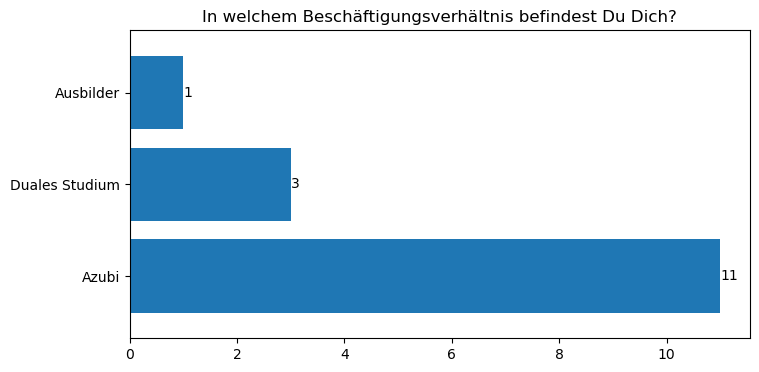

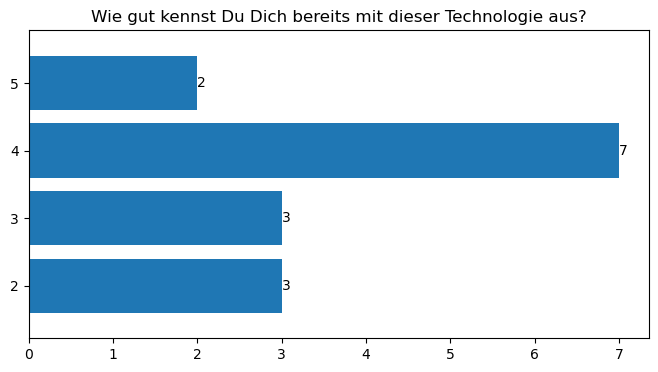

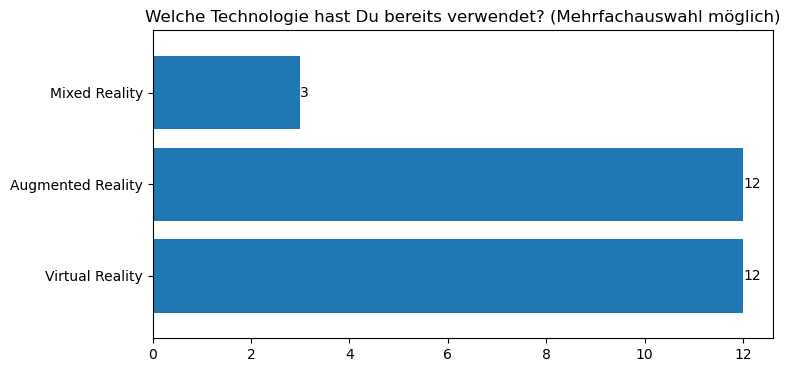

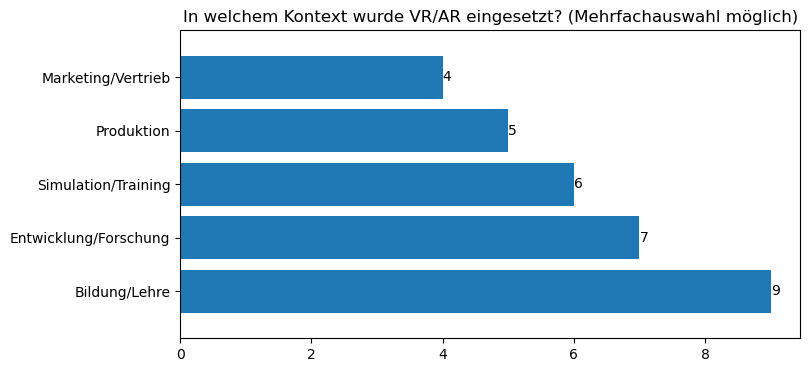

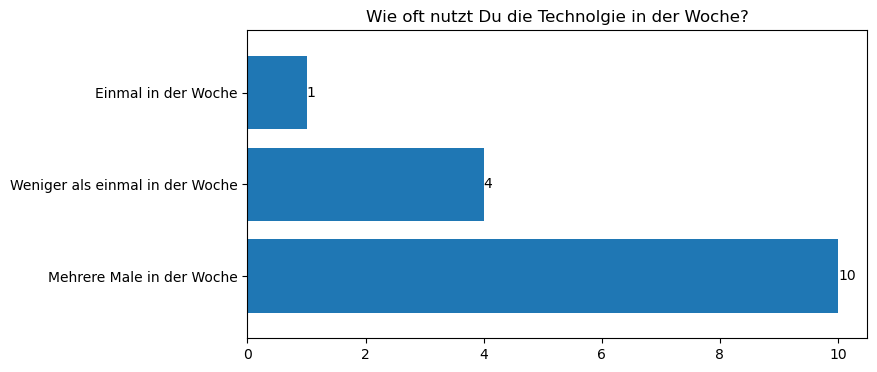

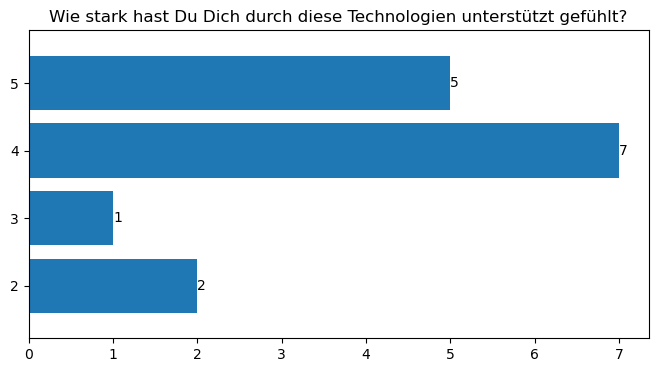

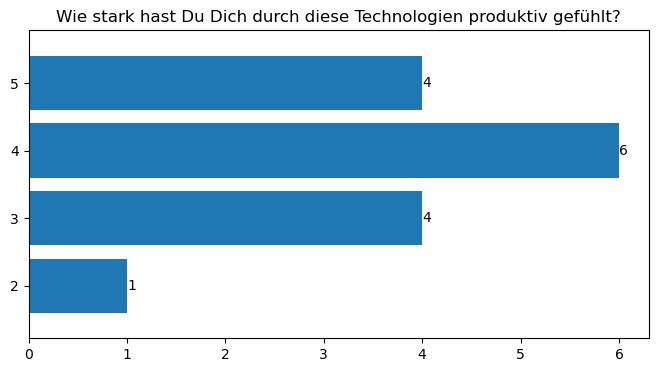

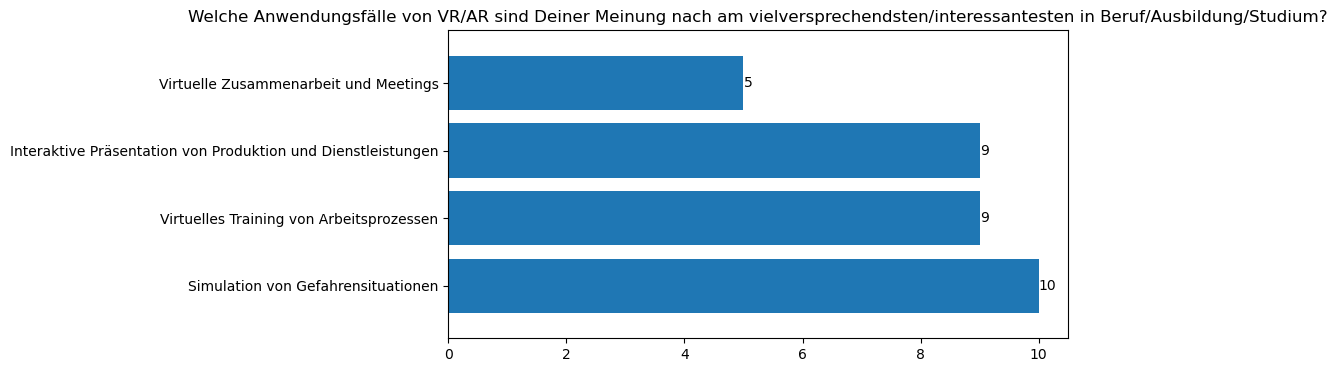

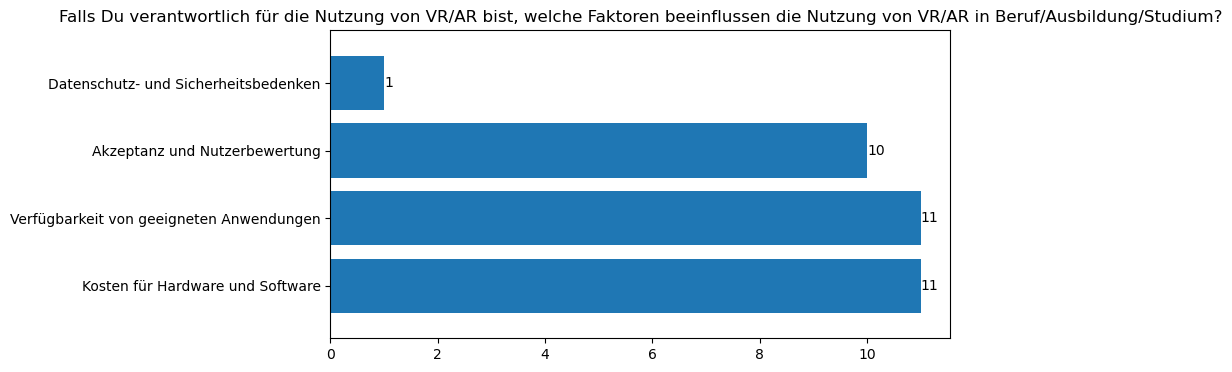

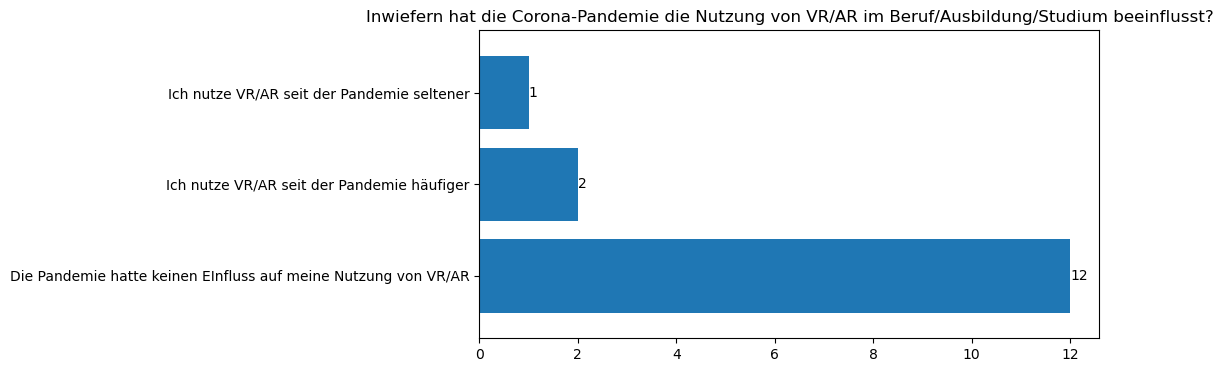

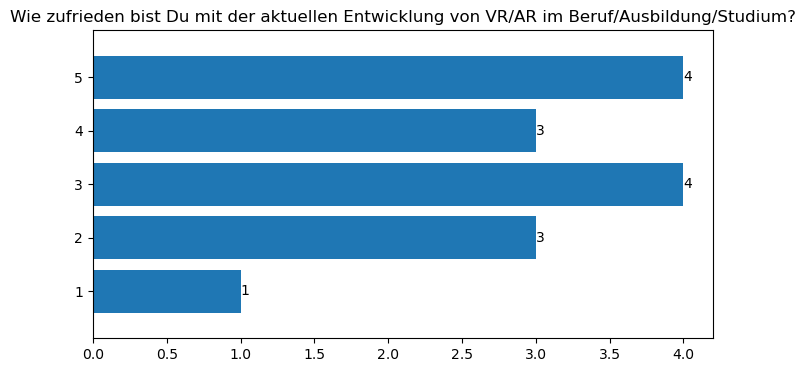

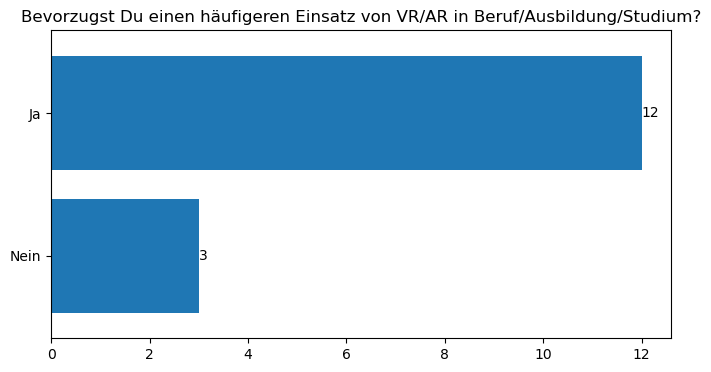

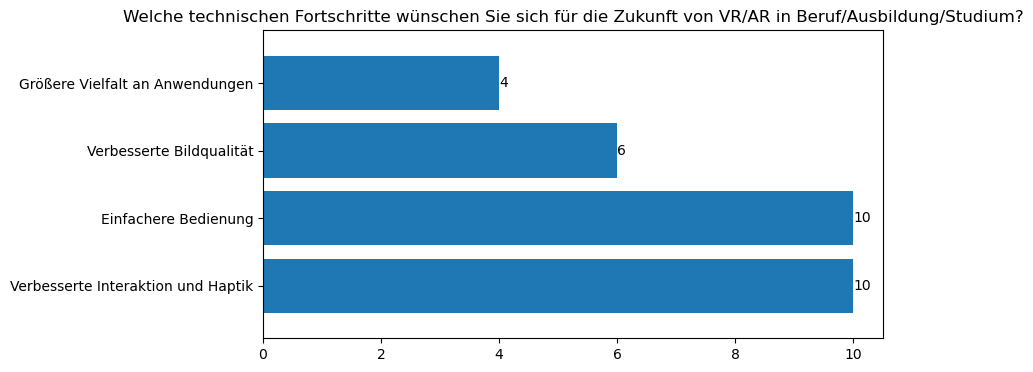

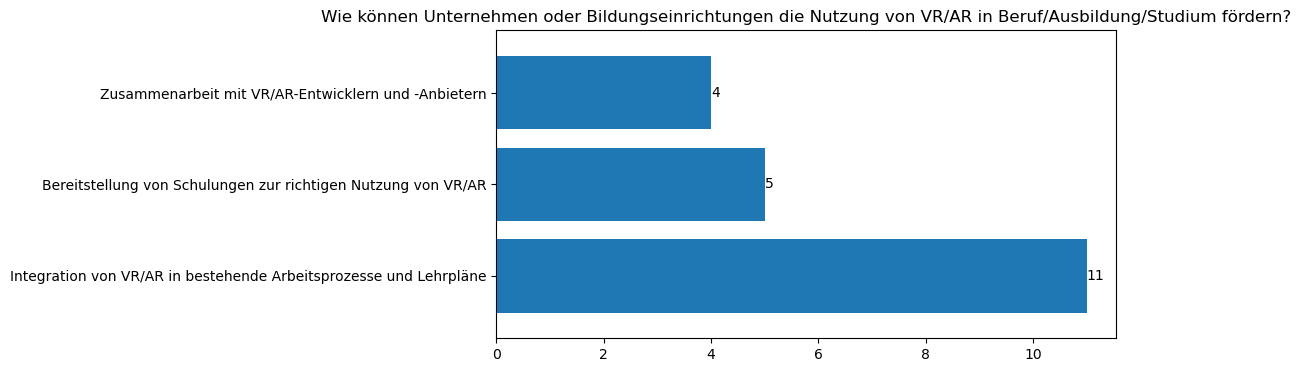

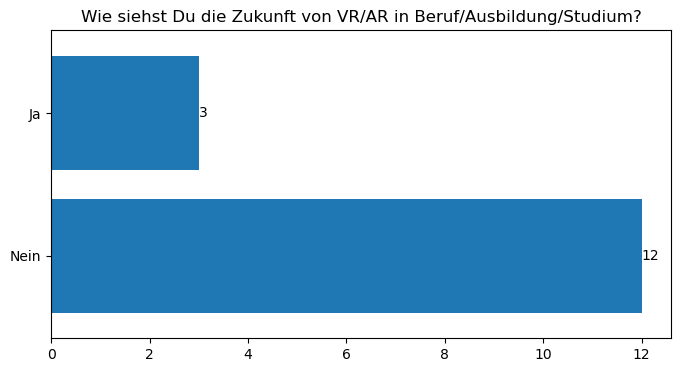

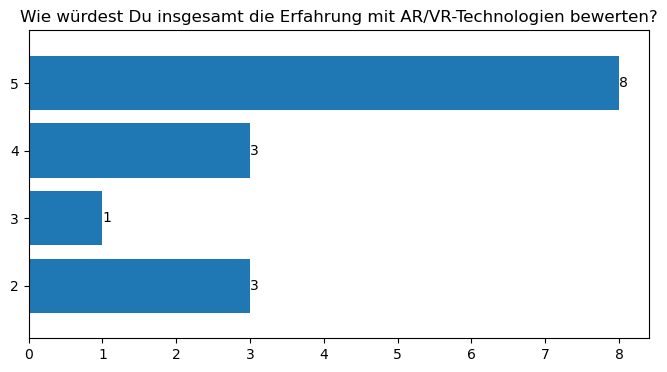

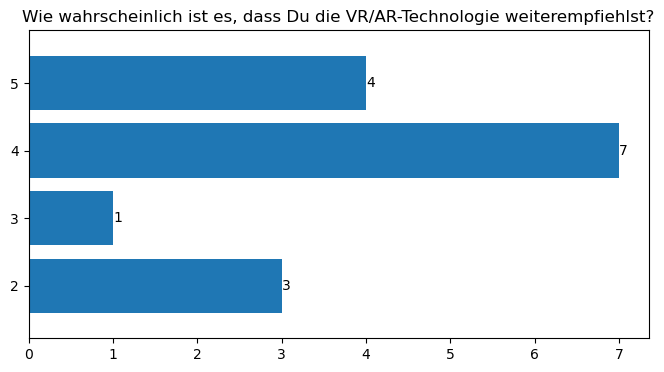

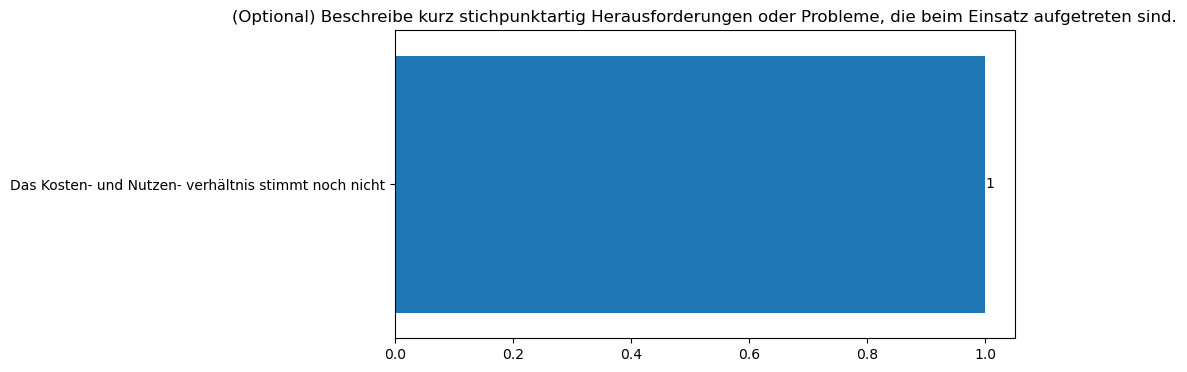

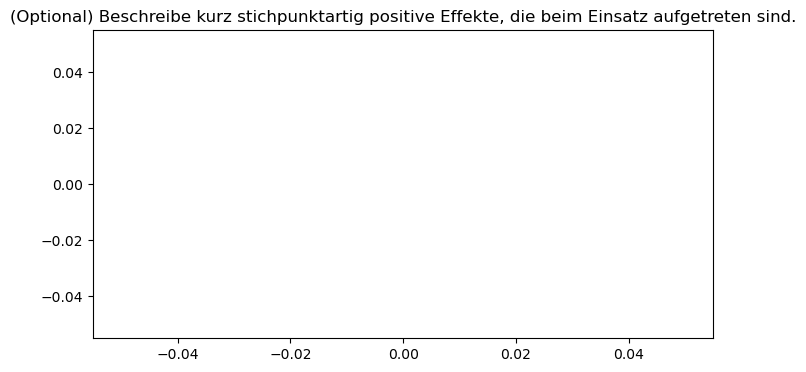

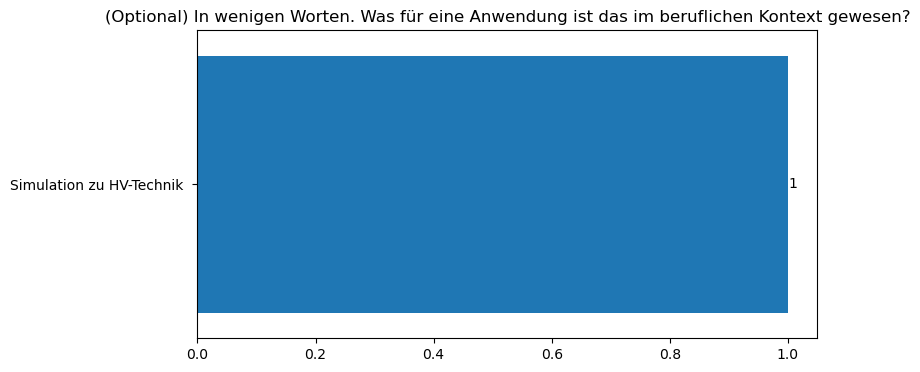

In [65]:
[plotDensity(df_b, col) for col in df_b.columns]

# Privater Kontext

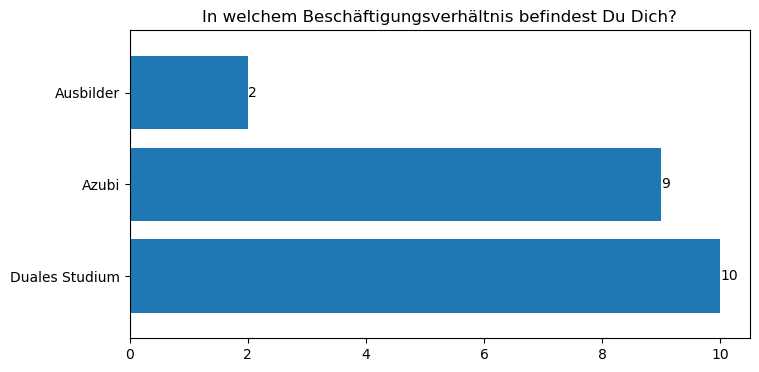

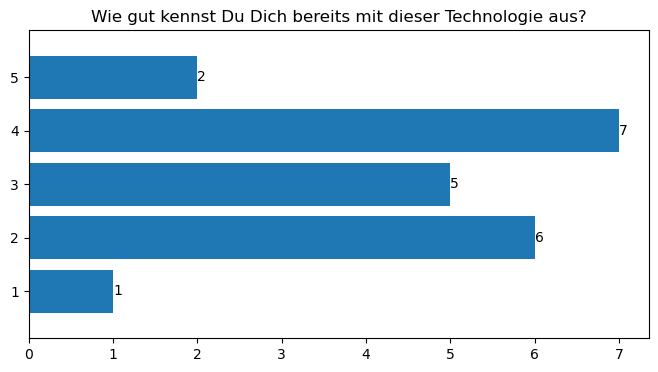

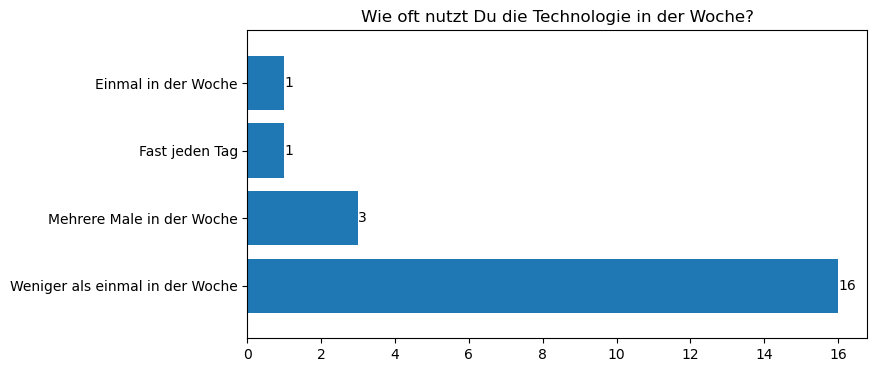

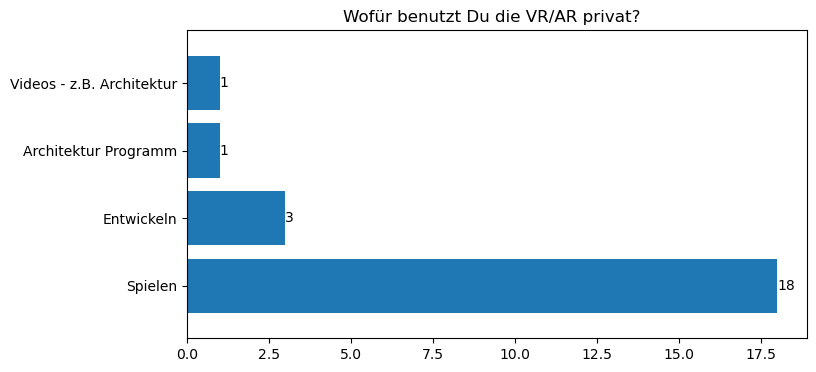

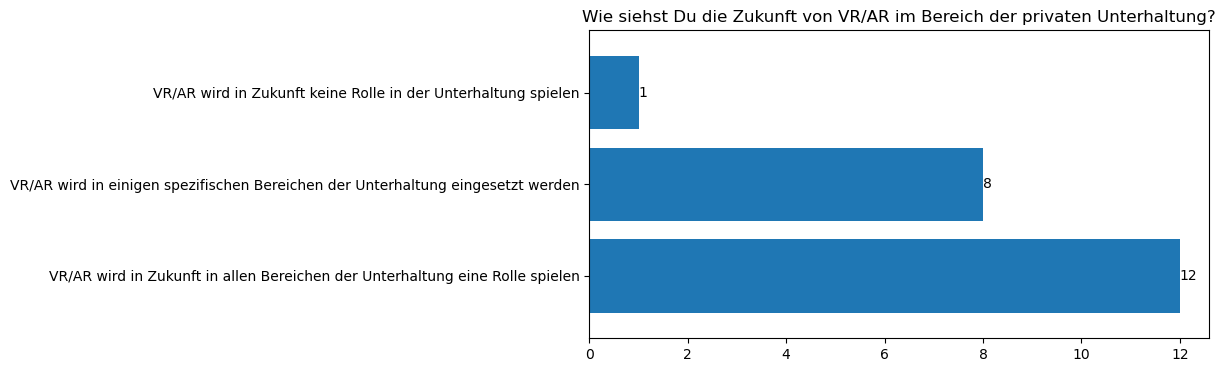

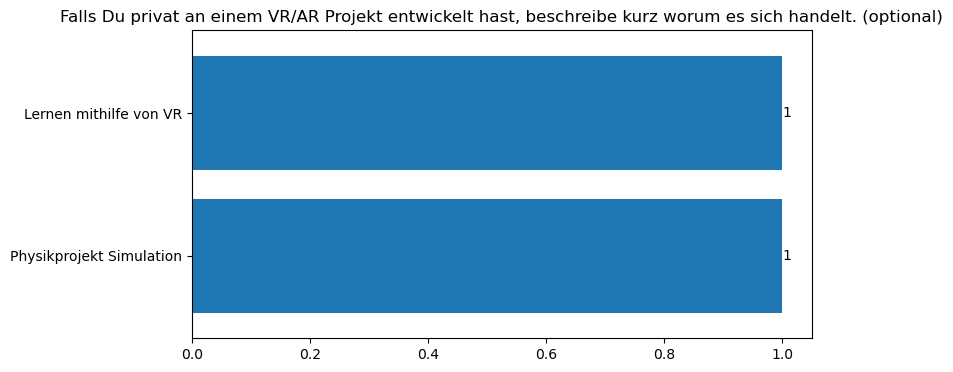

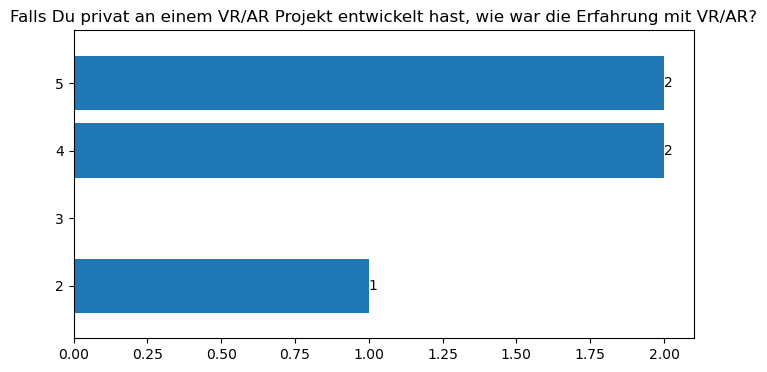

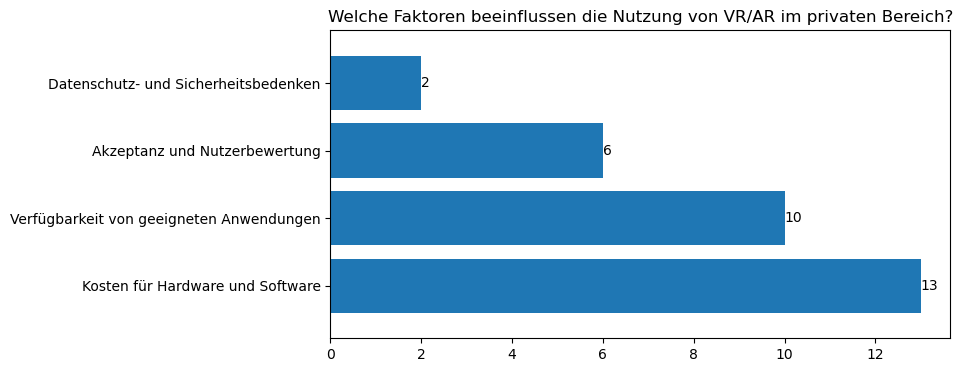

In [53]:
[plotDensity(df_p, col) for col in df_p.columns]   

# Alle

In [36]:
private = "Hast Du VR/AR bereits privat benutzt?"
job = "Hast Du VR/AR bereits beruflich genutzt?"

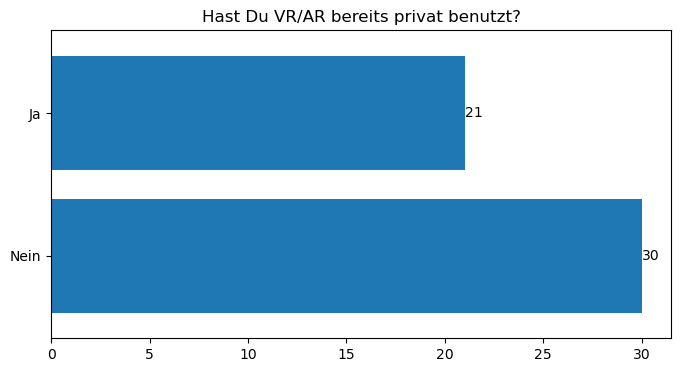

In [37]:
plotDensity(df, private, yes_no = True)

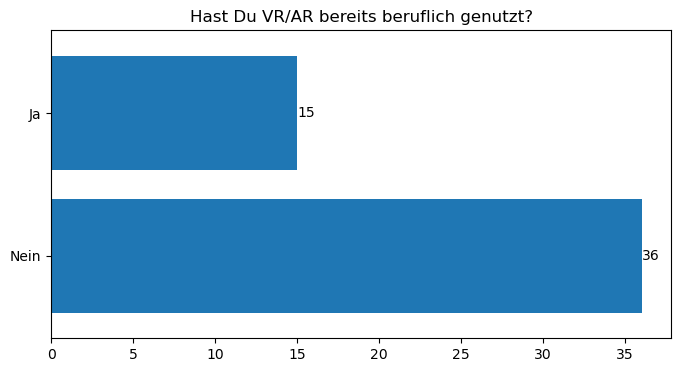

In [38]:
plotDensity(df, job, yes_no = True)

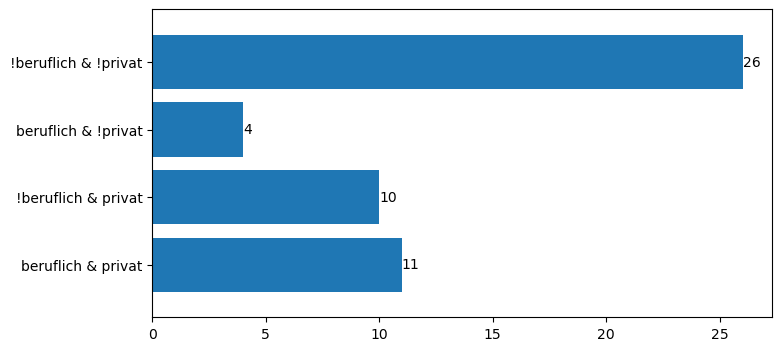

In [51]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.barh(y= ["beruflich & privat",
          "!beruflich & privat",
          "beruflich & !privat",
          "!beruflich & !privat",
        ],width=[
    df[df[private] & df[job]].__len__(),
    df[df[private] & ~df[job]].__len__(),
    df[~df[private] & df[job]].__len__(),
    df[~df[private] & ~df[job]].__len__()
])

# annotate
ax.bar_label(ax.containers[0], label_type='edge')

# pad the spacing between the number and the edge of the figure
ax.margins(y=0.1)


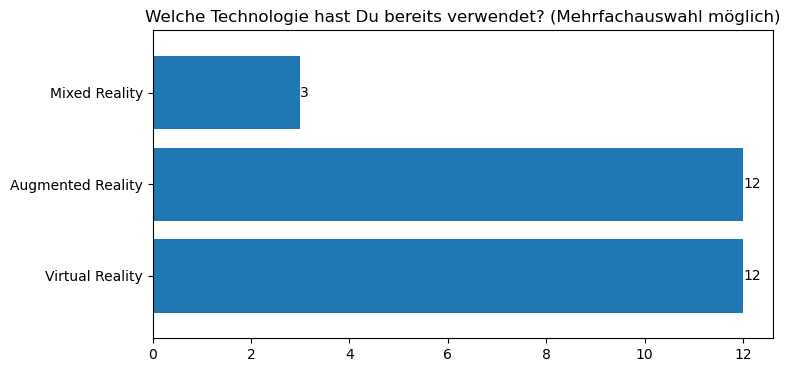

In [23]:
title = "Welche Technologie hast Du bereits verwendet? (Mehrfachauswahl möglich)"
plotDensity(df, title)

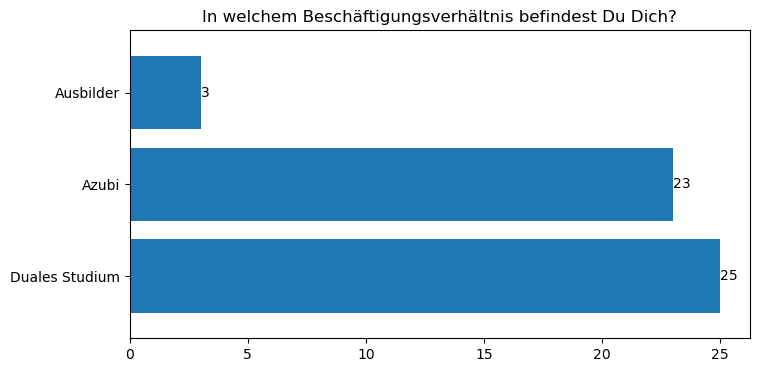

In [24]:
title = "In welchem Beschäftigungsverhältnis befindest Du Dich?"
plotDensity(df, title)

# Unerfahren

<class 'numpy.int64'>


[None, None, None, None, None, None]

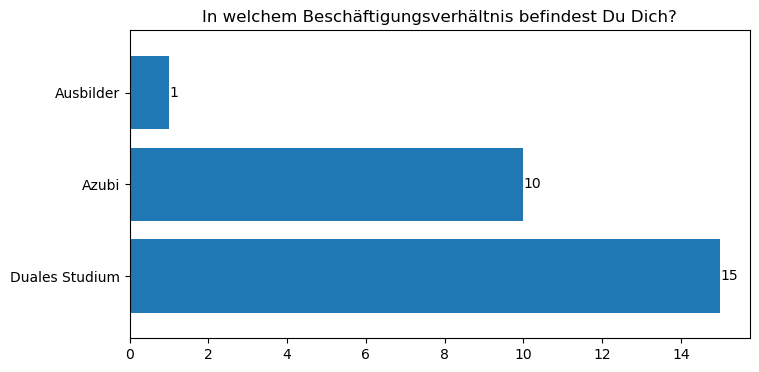

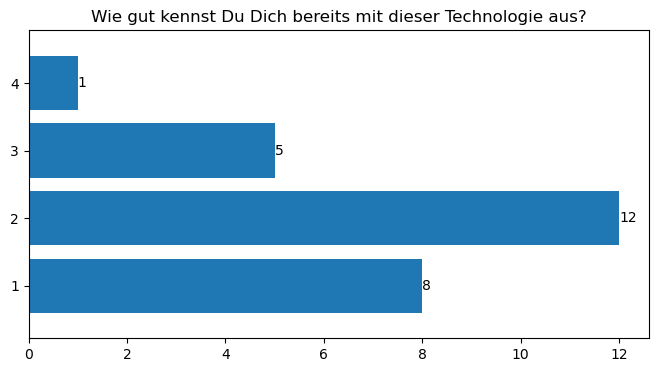

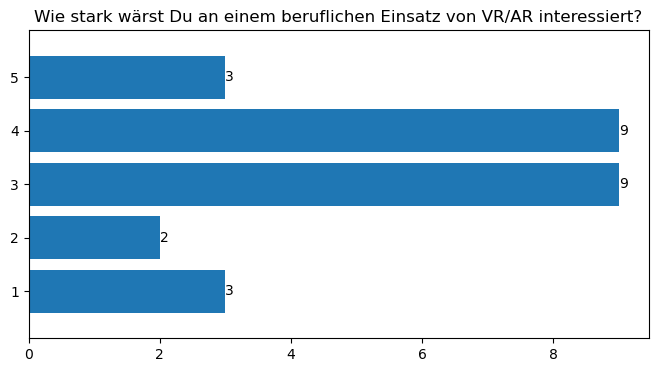

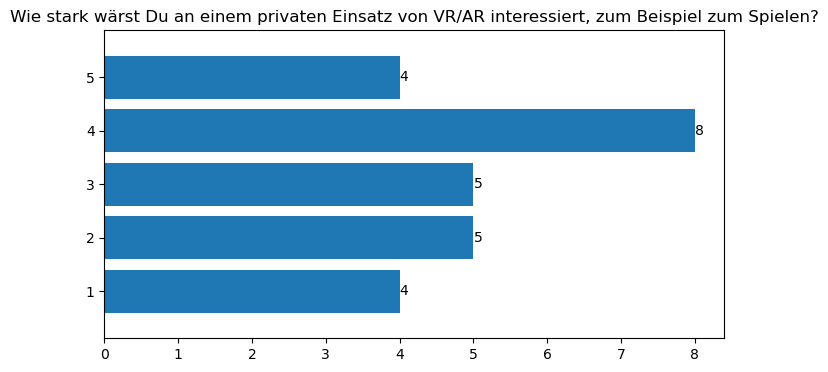

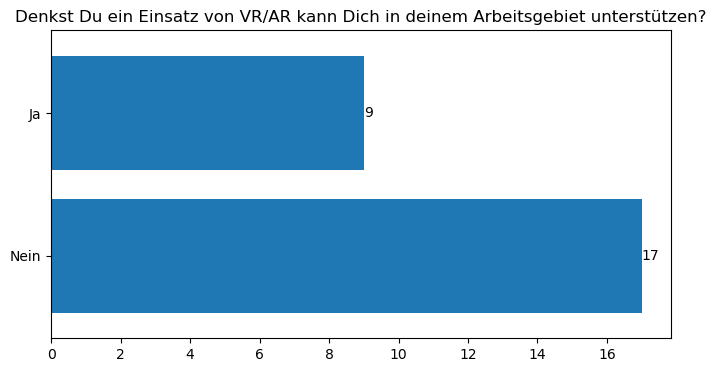

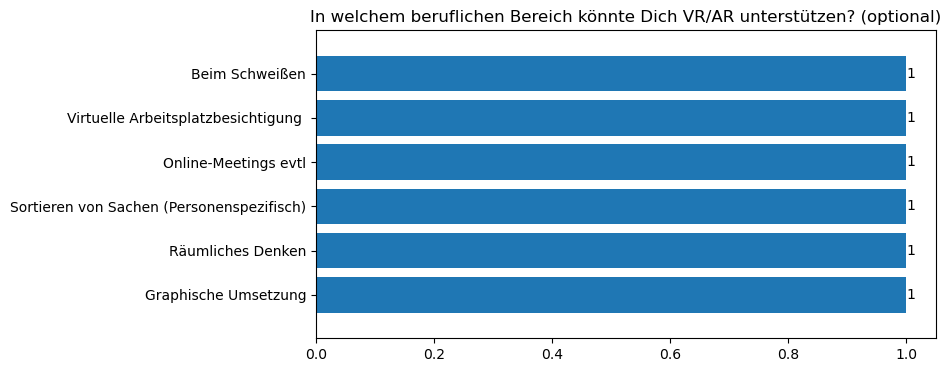

In [66]:
[plotDensity(df_n, col) for col in df_n.columns]